In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [159]:
new_data = pd.read_csv('TECHNICIANs RECORDS CLEANED.csv')
new_data

,DATE,CUSTOMER,ADDRESS,KVA,TECHNICIAN,JOB
0,2/10/2021,DR FESTUS AISABOKHALE,OFURE CLINIC OFF IKHIROLO RD EKPOMA EDO STATE,30,JOHNSON OLADIPO,INSPECTION
1,2/10/2021,VITA PRODUCTS PLC,OGBA IKEJA,20,TOMOLA BLESSING,COMMISSIONING
2,2/10/2021,RILEMAL SERVICES LTD,"14,BADE ABIONA ST ORILE AGEGE",20,UGBOME CHIEJINE,COMMISSIONING
3,2/10/2021,AZEEZ TEMITAYO AKINSANYA,NO 9 EMMANUEL CLOSE BALOGUN IKORODU,20,TOMOLA BLESSING,COMMISSIONING
4,29/09/2021,BIFEM-PARALU NIG LTD,"OJOTA KM 16, IKORODU ROAD",60,PETER IRIEKPEN,INSTALLATION
...,...,...,...,...,...,...
226,30/10/2021,MTN NIG COMMUNICATION,MTN OWO SWITCH,"1,000",MUYIWA ADEOYE,MAINTENANCE
227,30/10/2021,NAIRA GRILL,"NO 36,COUNTRY HOME RD,BENIN",nan,UGBOME CHIEJINE,INSTALLATION
228,18/10/2021,FIRST BANK PLC,ADEKUNLE BRANCH,135,JOHNSON OLADIPO,INSTALLATION
229,27/10/2021,CCECC,ABEOKUTA RAILWAY STATION,800,TIJANI LATEEF,INSTALLATION


In [160]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 6 columns):
DATE          231 non-null object
CUSTOMER      231 non-null object
ADDRESS       228 non-null object
KVA           226 non-null float64
TECHNICIAN    230 non-null object
JOB           230 non-null object
dtypes: float64(1), object(5)
memory usage: 11.0+ KB


In [161]:
job_details = pd.DataFrame(new_data['JOB'].groupby(new_data['TECHNICIAN']).value_counts(sort = True))
job_details.head()

JOB
TECHNICIAN    JOB                 
ABU CHUKWUDI  COMMISSIONING      5
              LOAD ASSESSMENT    2
              INSPECTION         1
ADELEKE       EXHAUST MOD        3
ADIEZE PRINCE MAINTENANCE        7

In [162]:
job_list = new_data['JOB'].unique()
job_list

array(['INSPECTION', 'COMMISSIONING', 'INSTALLATION', 'EXHAUST MOD',
       'LOAD ASSESSMENT', 'MAINTENANCE', nan], dtype=object)

In [163]:
tech_list = new_data['TECHNICIAN'].unique()
tech_list

array(['JOHNSON OLADIPO', 'TOMOLA BLESSING', 'UGBOME CHIEJINE',
       'PETER IRIEKPEN', 'JOSEPH . A.', 'TIJANI LATEEF', 'UGWU C PETER',
       'ABU CHUKWUDI', 'ADELEKE', nan, 'CHARLES IHEDIOHA',
       'MUYIWA ADEOYE', 'ADIEZE PRINCE', 'OBASUYI', 'BENSON', 'FRIDAY',
       'SAMSON ETUH', 'EBERE', 'NWANKWO KINGSLEY', 'MOHAMMAD ABDALLAH'],
      dtype=object)

In [164]:
len(tech_list)

20

In [165]:
comp_data = pd.DataFrame(columns = job_list)
for item in tech_list:
    ind_breakdown = new_data[new_data['TECHNICIAN'] == item]['JOB'].value_counts().rename_axis('TECHNICIANS')
    comp_data = comp_data.append(ind_breakdown, ignore_index = True)
    #comp_data = comp_data.loc[:, 'COMMISSIONING':'LOAD ASSESSMENT']
comp_data

,INSPECTION,COMMISSIONING,INSTALLATION,EXHAUST MOD,LOAD ASSESSMENT,MAINTENANCE,NaN
0,9,21,10,nan,3,nan,nan
1,7,17,5,nan,2,4,nan
2,8,19,9,1,2,4,nan
3,2,20,10,nan,nan,1,nan
4,nan,2,nan,nan,1,nan,nan
5,11,14,7,1,1,1,nan
6,1,nan,nan,nan,nan,nan,nan
7,1,5,nan,nan,2,nan,nan
8,nan,nan,nan,3,nan,nan,nan
9,nan,nan,nan,nan,nan,nan,nan


In [166]:
dta_staff = pd.DataFrame(data = comp_data)
dta_staff.index = tech_list
dta_staff.index.name = 'TECHNICIANS'
dta_staff

,INSPECTION,COMMISSIONING,INSTALLATION,EXHAUST MOD,LOAD ASSESSMENT,MAINTENANCE,NaN
TECHNICIANS,,,,,,,
JOHNSON OLADIPO,9,21,10,nan,3,nan,nan
TOMOLA BLESSING,7,17,5,nan,2,4,nan
UGBOME CHIEJINE,8,19,9,1,2,4,nan
PETER IRIEKPEN,2,20,10,nan,nan,1,nan
JOSEPH . A.,nan,2,nan,nan,1,nan,nan
TIJANI LATEEF,11,14,7,1,1,1,nan
UGWU C PETER,1,nan,nan,nan,nan,nan,nan
ABU CHUKWUDI,1,5,nan,nan,2,nan,nan
ADELEKE,nan,nan,nan,3,nan,nan,nan


In [167]:
pd.options.display.float_format = '{:,.0f}'.format
dta_staff

,INSPECTION,COMMISSIONING,INSTALLATION,EXHAUST MOD,LOAD ASSESSMENT,MAINTENANCE,NaN
TECHNICIANS,,,,,,,
JOHNSON OLADIPO,9,21,10,nan,3,nan,nan
TOMOLA BLESSING,7,17,5,nan,2,4,nan
UGBOME CHIEJINE,8,19,9,1,2,4,nan
PETER IRIEKPEN,2,20,10,nan,nan,1,nan
JOSEPH . A.,nan,2,nan,nan,1,nan,nan
TIJANI LATEEF,11,14,7,1,1,1,nan
UGWU C PETER,1,nan,nan,nan,nan,nan,nan
ABU CHUKWUDI,1,5,nan,nan,2,nan,nan
ADELEKE,nan,nan,nan,3,nan,nan,nan


In [168]:
dta_staff['TOTAL JOBS'] = dta_staff.sum(axis = 1)
dta_staff.loc['TOTAL'] = pd.Series(dta_staff.sum())
dta_staff

,INSPECTION,COMMISSIONING,INSTALLATION,EXHAUST MOD,LOAD ASSESSMENT,MAINTENANCE,NaN,TOTAL JOBS
TECHNICIANS,,,,,,,,
JOHNSON OLADIPO,9,21,10,nan,3,nan,nan,43
TOMOLA BLESSING,7,17,5,nan,2,4,nan,35
UGBOME CHIEJINE,8,19,9,1,2,4,nan,43
PETER IRIEKPEN,2,20,10,nan,nan,1,nan,33
JOSEPH . A.,nan,2,nan,nan,1,nan,nan,3
TIJANI LATEEF,11,14,7,1,1,1,nan,35
UGWU C PETER,1,nan,nan,nan,nan,nan,nan,1
ABU CHUKWUDI,1,5,nan,nan,2,nan,nan,8
ADELEKE,nan,nan,nan,3,nan,nan,nan,3


In [169]:
dta_staff.fillna(0)

,INSPECTION,COMMISSIONING,INSTALLATION,EXHAUST MOD,LOAD ASSESSMENT,MAINTENANCE,NaN,TOTAL JOBS
TECHNICIANS,,,,,,,,
JOHNSON OLADIPO,9,21,10,0,3,0,0,43
TOMOLA BLESSING,7,17,5,0,2,4,0,35
UGBOME CHIEJINE,8,19,9,1,2,4,0,43
PETER IRIEKPEN,2,20,10,0,0,1,0,33
JOSEPH . A.,0,2,0,0,1,0,0,3
TIJANI LATEEF,11,14,7,1,1,1,0,35
UGWU C PETER,1,0,0,0,0,0,0,1
ABU CHUKWUDI,1,5,0,0,2,0,0,8
ADELEKE,0,0,0,3,0,0,0,3


In [170]:
dta_staff_br = dta_staff.drop('TOTAL JOBS', axis = 1)
dta_staff_br

,INSPECTION,COMMISSIONING,INSTALLATION,EXHAUST MOD,LOAD ASSESSMENT,MAINTENANCE,NaN
TECHNICIANS,,,,,,,
JOHNSON OLADIPO,9,21,10,nan,3,nan,nan
TOMOLA BLESSING,7,17,5,nan,2,4,nan
UGBOME CHIEJINE,8,19,9,1,2,4,nan
PETER IRIEKPEN,2,20,10,nan,nan,1,nan
JOSEPH . A.,nan,2,nan,nan,1,nan,nan
TIJANI LATEEF,11,14,7,1,1,1,nan
UGWU C PETER,1,nan,nan,nan,nan,nan,nan
ABU CHUKWUDI,1,5,nan,nan,2,nan,nan
ADELEKE,nan,nan,nan,3,nan,nan,nan


Text(0, 0.5, 'JOBS')

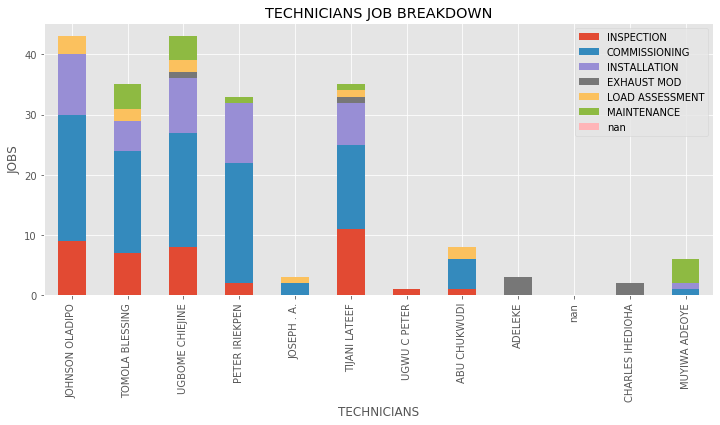

In [171]:
plt.style.use('ggplot')
break_plot = dta_staff_br[:12].plot.bar(figsize = (12,5), stacked = True, )
break_plot.set_title('TECHNICIANS JOB BREAKDOWN')
break_plot.set_ylabel('JOBS')

In [172]:
all_job_details = pd.DataFrame(new_data['JOB'].value_counts())
all_job_details

,JOB
COMMISSIONING,102
INSTALLATION,44
INSPECTION,41
MAINTENANCE,23
LOAD ASSESSMENT,11
EXHAUST MOD,9


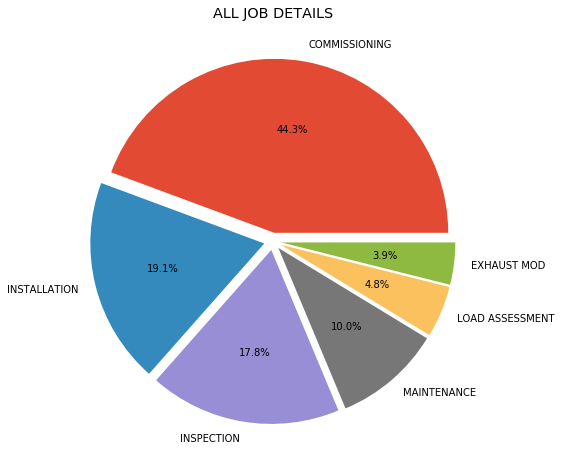

In [174]:
plt.style.use('ggplot')
ajd_plot = all_job_details.plot.pie(y = 'JOB',figsize = (8,8), label = '', 
                                    legend = False, autopct = '%1.1f%%', 
                                    explode = (0.05,0.05,0.05,0.05,0.05,0.05) )
ajd_plot.set_title('ALL JOB DETAILS')
ajd_plot

In [175]:
tech_total = pd.DataFrame(new_data['TECHNICIAN'].value_counts())
tech_total

,TECHNICIAN
UGBOME CHIEJINE,44
JOHNSON OLADIPO,43
TOMOLA BLESSING,35
TIJANI LATEEF,35
PETER IRIEKPEN,33
ADIEZE PRINCE,9
ABU CHUKWUDI,8
MUYIWA ADEOYE,6
JOSEPH . A.,3
ADELEKE,3


Text(0.5, 1.0, 'INDIVIDUAL CONTRIBUTION')

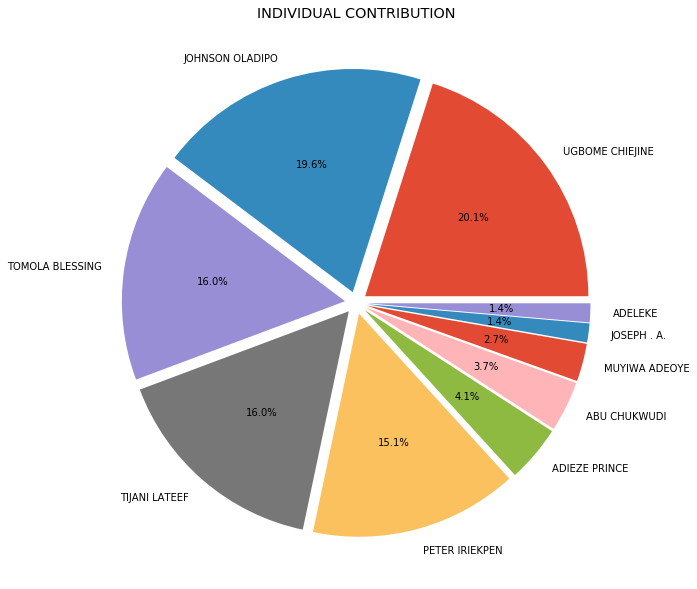

In [176]:
tt_plot = tech_total.head(10).plot.pie(figsize = (10,110), y = 'TECHNICIAN', legend = False, label = '', 
                    autopct = '%1.1f%%', explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05))
tt_plot.set_title('INDIVIDUAL CONTRIBUTION')

In [177]:
cust_list = new_data['CUSTOMER '].unique()
cust_list[:11]

array(['DR FESTUS AISABOKHALE', 'VITA PRODUCTS PLC',
       'RILEMAL SERVICES LTD', 'AZEEZ TEMITAYO AKINSANYA',
       'BIFEM-PARALU NIG LTD', 'ELTEES FARM',
       'ACCESS BANK/CITY OF KNOWLEDGE', 'OTORKHINE CHRISTOPHER',
       'OSUALA CHIDIOZIE GODSPOWER', 'ODUBANJO OLADAPO OYEWOLE',
       'FRANCIS AND ANITA NWADIARO'], dtype=object)

In [178]:
cust_data = pd.DataFrame(columns = job_list)
for item in cust_list:
    cust_breakdown = new_data[new_data['CUSTOMER '] == item]['JOB'].value_counts().rename_axis('CUSTOMER')
    cust_data = cust_data.append(cust_breakdown, ignore_index = True)
cust_data

,INSPECTION,COMMISSIONING,INSTALLATION,EXHAUST MOD,LOAD ASSESSMENT,MAINTENANCE,NaN
0,1,nan,nan,nan,nan,nan,nan
1,nan,1,nan,nan,nan,nan,nan
2,nan,2,nan,nan,nan,nan,nan
3,nan,3,nan,nan,nan,1,nan
4,nan,3,1,nan,nan,nan,nan
...,...,...,...,...,...,...,...
135,nan,nan,nan,nan,nan,1,nan
136,nan,1,nan,nan,nan,nan,nan
137,nan,1,nan,nan,nan,nan,nan
138,nan,nan,1,nan,nan,nan,nan


In [179]:
cust_data['TOTAL JOBS'] = cust_data.sum(axis =1)
cust_data.index = cust_list
cust_data.index.name = 'CUSTOMER'
cust_data

,INSPECTION,COMMISSIONING,INSTALLATION,EXHAUST MOD,LOAD ASSESSMENT,MAINTENANCE,NaN,TOTAL JOBS
CUSTOMER,,,,,,,,
DR FESTUS AISABOKHALE,1,nan,nan,nan,nan,nan,nan,1
VITA PRODUCTS PLC,nan,1,nan,nan,nan,nan,nan,1
RILEMAL SERVICES LTD,nan,2,nan,nan,nan,nan,nan,2
AZEEZ TEMITAYO AKINSANYA,nan,3,nan,nan,nan,1,nan,4
BIFEM-PARALU NIG LTD,nan,3,1,nan,nan,nan,nan,4
...,...,...,...,...,...,...,...,...
CHARVET CONSTRUCTION LTD,nan,nan,nan,nan,nan,1,nan,1
JUMOKE WALE-SEBIOMO,nan,1,nan,nan,nan,nan,nan,1
HORSELY'S AIRLINE SERVICES,nan,1,nan,nan,nan,nan,nan,1


In [180]:
cust_data

,INSPECTION,COMMISSIONING,INSTALLATION,EXHAUST MOD,LOAD ASSESSMENT,MAINTENANCE,NaN,TOTAL JOBS
CUSTOMER,,,,,,,,
DR FESTUS AISABOKHALE,1,nan,nan,nan,nan,nan,nan,1
VITA PRODUCTS PLC,nan,1,nan,nan,nan,nan,nan,1
RILEMAL SERVICES LTD,nan,2,nan,nan,nan,nan,nan,2
AZEEZ TEMITAYO AKINSANYA,nan,3,nan,nan,nan,1,nan,4
BIFEM-PARALU NIG LTD,nan,3,1,nan,nan,nan,nan,4
...,...,...,...,...,...,...,...,...
CHARVET CONSTRUCTION LTD,nan,nan,nan,nan,nan,1,nan,1
JUMOKE WALE-SEBIOMO,nan,1,nan,nan,nan,nan,nan,1
HORSELY'S AIRLINE SERVICES,nan,1,nan,nan,nan,nan,nan,1


In [181]:
cust_data = cust_data.sort_values(by = 'TOTAL JOBS', ascending = False)
cust_data

,INSPECTION,COMMISSIONING,INSTALLATION,EXHAUST MOD,LOAD ASSESSMENT,MAINTENANCE,NaN,TOTAL JOBS
CUSTOMER,,,,,,,,
UNITED BANK FOR AFRICA PLC,3,3,4,nan,nan,2,nan,12
ACCESS BANK PLC,3,4,2,nan,nan,2,nan,11
ACCESS BANK,3,nan,2,nan,nan,1,nan,6
DANGOTE GROUP,2,nan,1,1,1,nan,nan,5
LIRS,1,2,2,nan,nan,nan,nan,5
...,...,...,...,...,...,...,...,...
OBA DR SULAIMON ADESINA RAJI ASHADE,nan,1,nan,nan,nan,nan,nan,1
MTN B2B,nan,nan,nan,nan,nan,1,nan,1
AMO FARMS,nan,nan,nan,nan,nan,1,nan,1


In [182]:
cd_plot = pd.DataFrame(cust_data['TOTAL JOBS'].head(10))

In [183]:
cd_plot

,TOTAL JOBS
CUSTOMER,
UNITED BANK FOR AFRICA PLC,12
ACCESS BANK PLC,11
ACCESS BANK,6
DANGOTE GROUP,5
LIRS,5
LE GRANDE ENGINEERING SERVICES,5
DENIS MARTINS AREBAMEN,4
AZEEZ TEMITAYO AKINSANYA,4
BIFEM-PARALU NIG LTD,4


Text(0.5, 1.0, 'TOP CUSTOMERS')

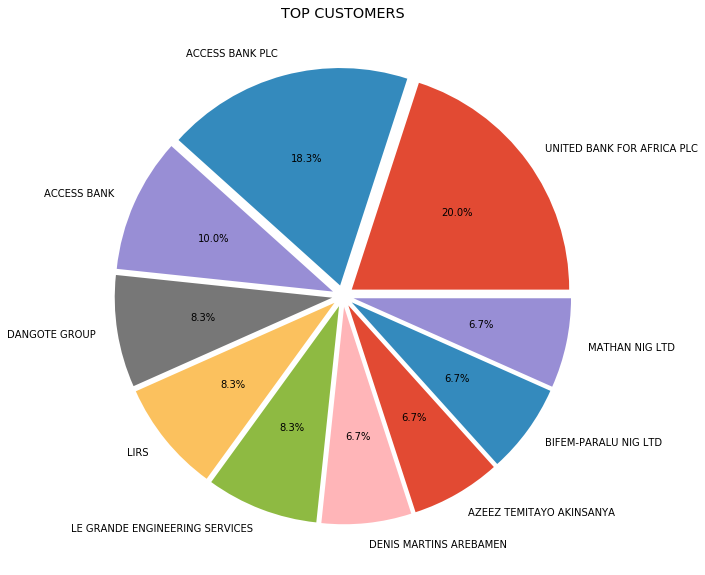

In [184]:
cdd_plot = cd_plot.plot.pie(figsize = (10,10), y = 'TOTAL JOBS', legend = False, label = '', 
                    autopct = '%1.1f%%', explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05))
cdd_plot.set_title('TOP CUSTOMERS')

Text(0.5, 1.0, 'TOP CUSTOMERS')

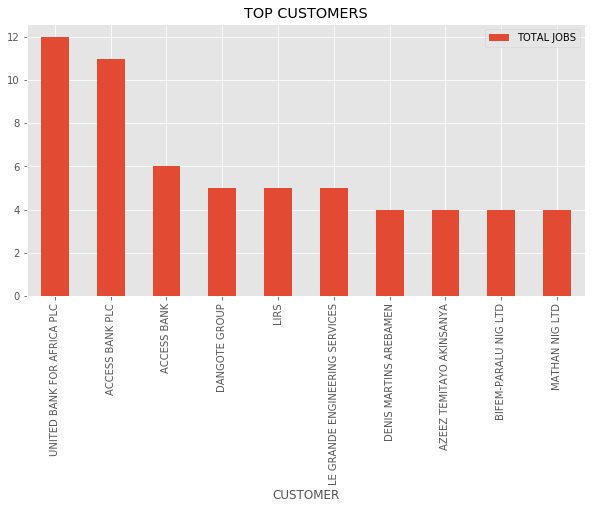

In [185]:
cdd_plot1 = cd_plot.plot.bar(figsize = (10,5), y = 'TOTAL JOBS')
cdd_plot1.set_title('TOP CUSTOMERS')

In [186]:
gen_list = new_data['KVA'].unique()
gen_list

array([  30.,   20.,   60.,  250.,  100.,    0.,   40.,  150.,   50.,
        125.,   80.,   15.,   13., 1000.,  135., 2000.,   65.,   nan,
        400.,  410.,  200.,  350.,  800.,  500.,   18.,    9., 1500.,
       1250.,  670.])

In [187]:
gen_data = pd.DataFrame(columns = job_list)
for item in gen_list:
    gen_breakdown = new_data[new_data['KVA'] == item]['JOB'].value_counts().rename_axis('KVA')
    gen_data = gen_data.append(gen_breakdown, ignore_index = True)
gen_data.head()

,INSPECTION,COMMISSIONING,INSTALLATION,EXHAUST MOD,LOAD ASSESSMENT,MAINTENANCE,NaN
0,2,12,7,1,2,2,nan
1,8,21,1,nan,1,1,nan
2,4,17,7,3,1,1,nan
3,3,2,nan,nan,nan,nan,nan
4,6,10,6,nan,1,2,nan


In [188]:
gen_data.index = gen_list
gen_data.index.name = 'KVA'
gen_data = gen_data.sort_values(by = 'KVA',ascending=False)
gen_data.head()

,INSPECTION,COMMISSIONING,INSTALLATION,EXHAUST MOD,LOAD ASSESSMENT,MAINTENANCE,NaN
KVA,,,,,,,
"2,000",nan,nan,nan,nan,nan,1,nan
"1,500",nan,1,nan,nan,nan,nan,nan
"1,250",nan,nan,1,nan,nan,nan,nan
"1,000",nan,1,1,2,nan,3,nan
800,nan,nan,1,nan,nan,2,nan


In [189]:
gen_data.head()

,INSPECTION,COMMISSIONING,INSTALLATION,EXHAUST MOD,LOAD ASSESSMENT,MAINTENANCE,NaN
KVA,,,,,,,
"2,000",nan,nan,nan,nan,nan,1,nan
"1,500",nan,1,nan,nan,nan,nan,nan
"1,250",nan,nan,1,nan,nan,nan,nan
"1,000",nan,1,1,2,nan,3,nan
800,nan,nan,1,nan,nan,2,nan


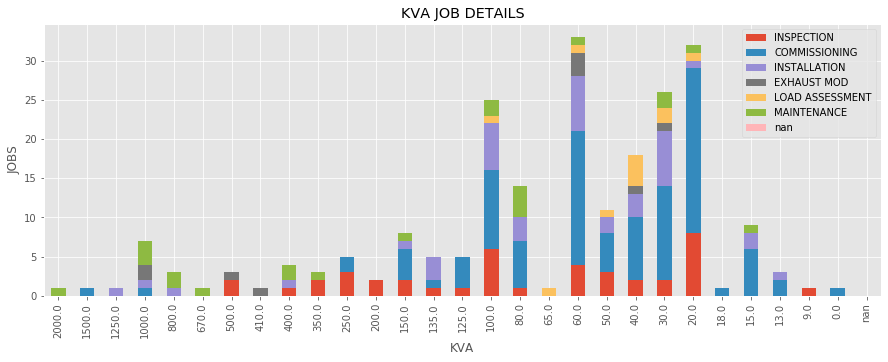

In [190]:
gp = gen_data.plot.bar(figsize = (15,5), stacked = True)
gp.set_ylabel('JOBS')
gp.set_title('KVA JOB DETAILS')
gp